#INFO7390 Assignment 1 - "Understanding Data"

Niharika Santhoshini Karri
002727629

Title: Creating Notebooks for Data Science "Understanding Data"

#Can the use of SHAP analysis effectively distinguish the most influential features between different models?

By exploring how SHAP analysis attributes importance to individual features across models, data scientists can gain valuable insights into the factors driving model predictions. This investigation bridges the gap between data exploration and model interpretation, enabling a deeper understanding of the data's nuances and the models' behaviour.

#Why is it interesting?

This question is interesting because it explores the practical utility of SHAP analysis in comparing the feature importance across different machine learning models, shedding light on their strengths and weaknesses, and ultimately informing model selection and enhancement strategies for real-world applications.

#SHAP ANALYSIS

Shapley Additive Explanations, commonly referred to as SHAP, is a method used in machine learning for explaining the predictions made by complex models. The goal of SHAP analysis is to determine the contribution of each feature to the prediction made by the model. SHAP analysis provides a unified framework to explain the output of any machine learning model, including deep neural networks, decision trees, and random forests.

The SHAP method is based on the Shapley value, which is a concept from cooperative game theory. In game theory, the Shapley value is used to determine the contribution of each player to the outcome of a game. In the context of machine learning, the features are the players, and the prediction is the outcome of the game.

The SHAP method calculates the contribution of each feature to the prediction by measuring how much the feature changes the prediction when it is included or excluded from the model. The SHAP value of a feature is the average marginal contribution of the feature across all possible feature combinations. In other words, the SHAP value of a feature is the difference between the prediction when the feature is included and the prediction when the feature is excluded, averaged over all possible combinations of features.
SHAP analysis provides a way to quantify the importance of each feature in making predictions for different machine learning models. This comparison helps us understand which features have the most influence on model outcomes. It's interesting because it allows us to see if the linear model, AutoML model, and random forest regressor assign different degrees of importance to the same features, potentially revealing insights about the data and the models' behaviour.

By analyzing SHAP values across different models, we can gain insights into their strengths and weaknesses. For example, if the linear model assigns high importance to a feature while the random forest assigns low importance, it suggests that the relationship between that feature and the target variable might be non-linear. This kind of insight can help us understand the limitations of each model type. The insights gained from comparing SHAP values can have direct implications for selecting the most suitable model for a specific task.

#Significance of shap analysis in predicting the best model
Shap analysis is a powerful tool in model interpretability and can help in selecting the best model for a given task. Here are some ways Shap analysis can be used to predict the best model:

Feature Importance: Shap analysis can be used to understand the importance of each feature in the model's prediction. By analyzing the Shap values of each feature, we can identify the most important features for the task at hand. This information can be used to select the best model by comparing the feature importance across different models.

Model Comparison: Shap analysis can be used to compare the performance of different models on a given task. By analyzing the Shap values of each model, we can identify which model is better at predicting the outcome for specific features.

Model Optimization: Shap analysis can be used to optimize model performance by identifying the features that are negatively impacting the model's prediction. By analyzing the Shap values of each feature, we can identify which features are causing errors in the model and optimize the model accordingly.



In [25]:
!pip install shap

In [26]:
# Import Libraries
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [27]:
ds = pd.read_csv("https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/androidGames/main/android-games.csv")

In [28]:
objList = ds.select_dtypes(exclude = "object").columns

In [29]:
objList=objList.drop('paid')

In [30]:
X, y = ds[objList],ds.paid

In [31]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
from imblearn.over_sampling import SMOTE
#X_ts = ts_data.iloc[:,0:14]
#y_ts = ts_data.iloc[:,-1]
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Fits the explainer
explainer = shap.explainers.Linear(model,X_train)
# Calculates the SHAP values
shap_values = explainer(X_train)

#Shap Analysis on Linear models

#Linear models

Linear models are a class of machine learning algorithms that are commonly used for regression and classification tasks. The basic idea behind linear models is to create a linear relationship between the input variables and the output variable.

There are several types of linear models, including:

Linear Regression: In linear regression, the goal is to create a linear relationship between the input variables and the output variable. This is done by finding the coefficients that minimize the sum of the squared differences between the predicted and actual values.

Logistic Regression: Logistic regression is a linear model used for classification tasks. It predicts the probability of an input belonging to a particular class.

Linear Discriminant Analysis: Linear Discriminant Analysis (LDA) is a statistical method used for classification. It finds a linear combination of features that best separates the classes.

Support Vector Machines: Support Vector Machines (SVMs) are linear models used for classification tasks. They find the hyperplane that best separates the classes.

Linear models are popular because they are simple, interpretable, and computationally efficient. However, they may not be able to capture complex non-linear relationships between the input and output variables.

For linear models, SHAP analysis can be used to identify the features that have the greatest impact on the outcome. This is done by computing the Shapley values for each feature, which measure the contribution of each feature to the prediction.

In the case of linear models, SHAP can be used to identify the importance of each feature in the prediction. It does this by measuring the contribution of each feature to the difference between the actual prediction and the average prediction.

To perform a SHAP analysis on a linear model, the following steps can be followed:

Train a linear model on the data.

Generate a dataset of representative background samples that will be used to estimate the baseline for the feature values. This baseline is used to calculate the SHAP values.

Use the SHAP library to calculate the SHAP values for each feature. The SHAP values represent the contribution of each feature to the difference between the actual prediction and the average prediction.

Visualize the SHAP values to gain insights into the model's behavior. This can be done using a summary plot, which shows the overall impact of each feature on the model's output, or a dependence plot, which shows how the predicted output changes as a function of a single feature.

To perform SHAP analysis on a linear model, you can use the SHAP library in Python. The following is an example of how to perform SHAP analysis on a linear regression model:

#SHAP summary for linear model
The shap.summary_plot() method can be used to visualize the SHAP values for all features in the dataset. The method creates a summary plot that shows the mean absolute SHAP value for each feature, sorted by importance. The size of each feature's marker in the plot represents the magnitude of the feature's SHAP value, and the color of the marker represents the direction of the feature's impact on the model's prediction. Positive impact is shown in red, and negative impact is shown in blue.

Additionally, the shap.dependence_plot() method can be used to create a dependence plot for a given feature. A dependence plot shows how the value of a single feature affects the model's predictions. The plot shows the relationship between the feature's value and the corresponding SHAP value for each instance in the dataset.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


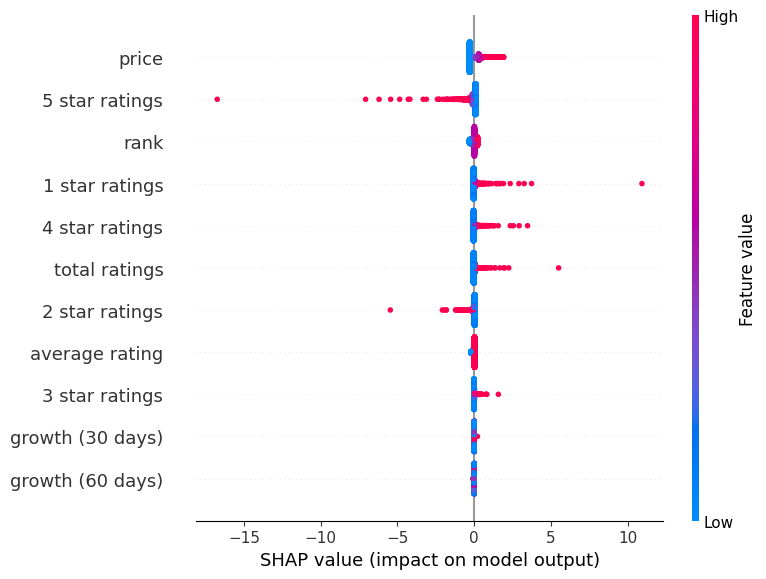

In [35]:
# SHAP summary for Linear Model
shap.summary_plot(shap_values, X_train)

#Random Forest Regressor

A random forest regressor is commonly used for regression tasks. It is an ensemble method that combines multiple decision trees to make predictions.

In a random forest regressor, the input data is randomly sampled with replacement to create multiple subsets of the data. A decision tree is trained on each subset of the data, and each tree makes a prediction for the target variable. The final prediction is then calculated by taking the average of all the individual tree predictions.

Random forests are popular because they can handle non-linear relationships between input variables and the target variable, and can also handle high-dimensional input data with many features. They are also robust to overfitting and can handle missing values in the input data.

To train a random forest regressor, hyperparameters such as the number of trees, the maximum depth of each tree, and the number of input variables considered at each split point must be specified. These hyperparameters can be tuned using cross-validation techniques to optimize the model's performance on the training data.

Once trained, a random forest regressor can be used to make predictions on new, unseen data. The model is capable of predicting continuous numeric values, making it useful for a variety of regression tasks, such as predicting housing prices or stock prices.

Shap analysis on random forest regressor
In the context of a random forest regressor, SHAP analysis can be used to understand the importance of each feature in the model's predictions. Specifically, SHAP values can be calculated for each feature and used to rank the features by importance. This can help to identify which features have the greatest impact on the model's predictions and provide insights into the relationships between the features and the target variable.

In a random forest, each decision tree makes a prediction, and the final prediction is the average of all the individual tree predictions. The SHAP values explain the contribution of each feature to the final prediction by calculating the difference between the predicted output with and without the feature.

[0.08159634 0.01223456 0.02752519 0.02549959 0.00349246 0.72781118
 0.0191946  0.01847705 0.02776367 0.03385004 0.02255533]


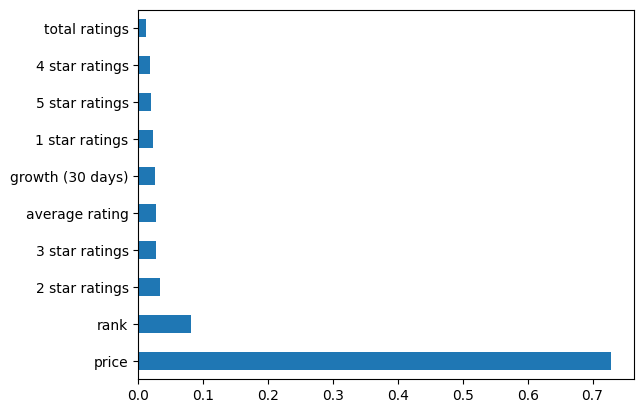

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
extra_model = ExtraTreesClassifier()
extra_model.fit(X_train,y_train)
print(extra_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extra_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
tree_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=10)
tree_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [38]:
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier, export_graphviz

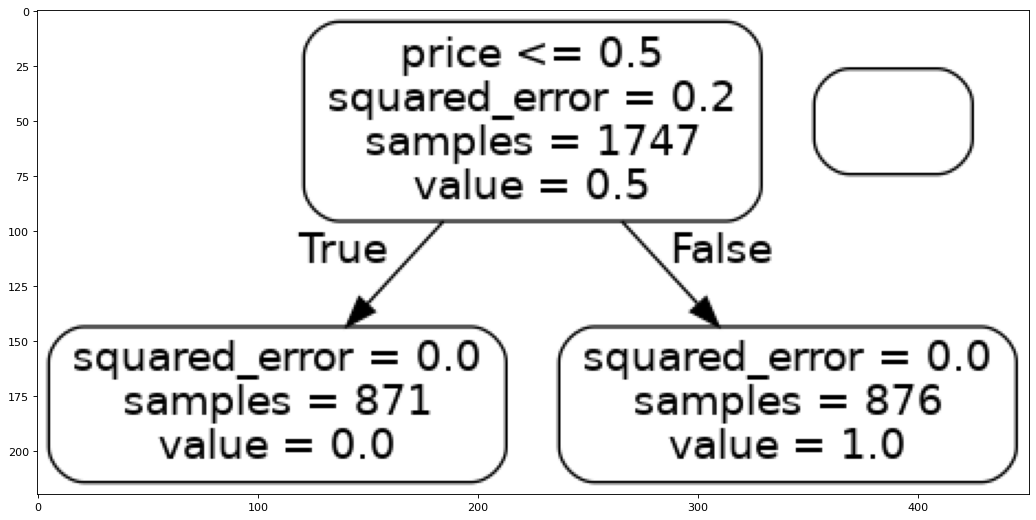

In [39]:
#Visualization of Nodes

figure(figsize=(16, 12), dpi=80)
tree= tree_model.estimators_[0]
export_graphviz(
tree,
out_file="tree.dot",
feature_names=list (X_train.columns),
rounded=True,
precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img=mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

Steps in plotting the Extra tree classifier create an instance of the ExtraTreesClassifier() model, which is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

train the model on a training dataset X_train and the corresponding target variable y_train. This involves constructing multiple decision trees on the training data to form a forest of trees.

print the feature importances of the trained model. Feature importance is a measure of how much a feature (i.e. an input variable) contributes to the model's performance. It is based on the average (or sum) of the reduction in impurity (e.g. entropy or Gini index) caused by each feature in the decision tree.

create a pandas series object that contains the feature importances of the trained model. The series is indexed by the feature names (i.e. column names) of the training data.

create a horizontal bar plot of the top 10 most important features, based on their feature importance scores. This provides a visual representation of the relative importance of each feature in the model. Finally, plt.show() displays the plot on the screen.

In [40]:
explain = shap.TreeExplainer(tree)
tree_shap_values = explain.shap_values(X_train)

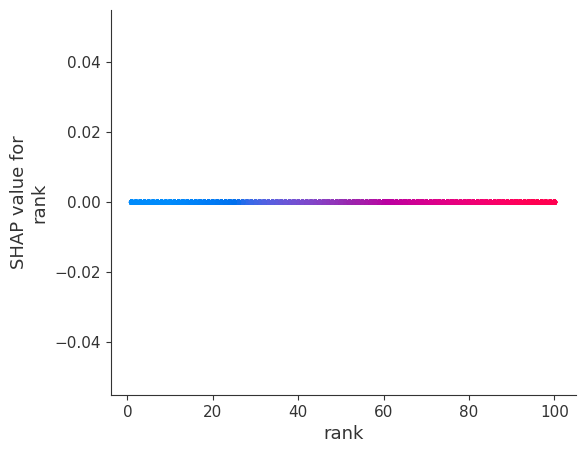

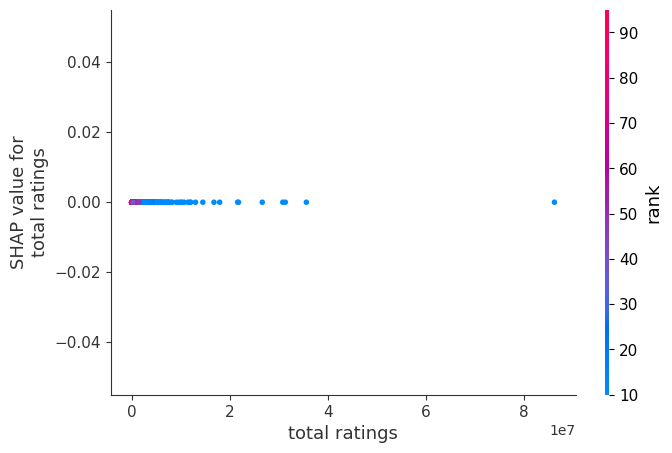

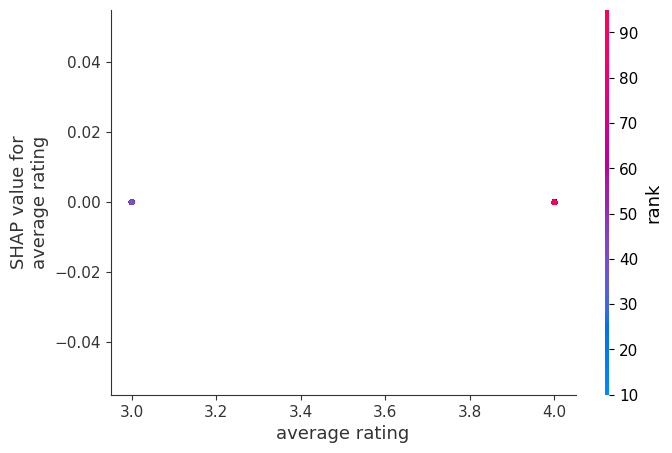

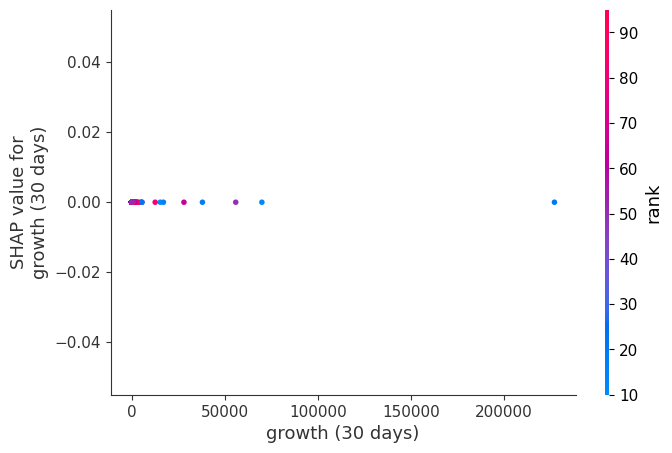

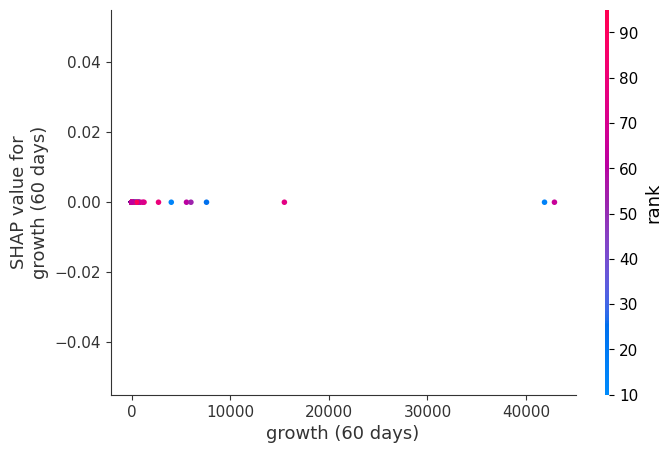

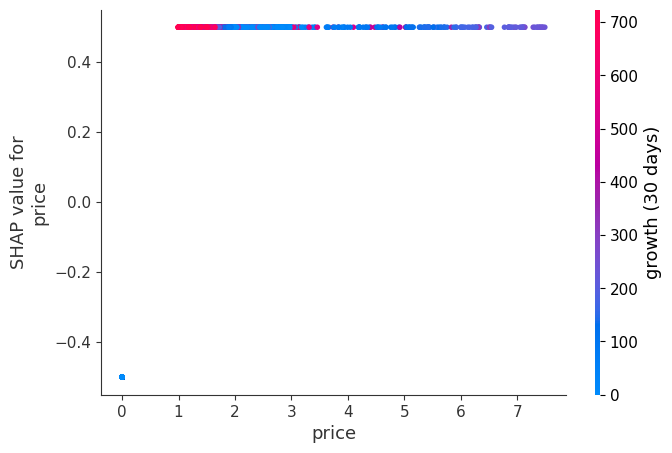

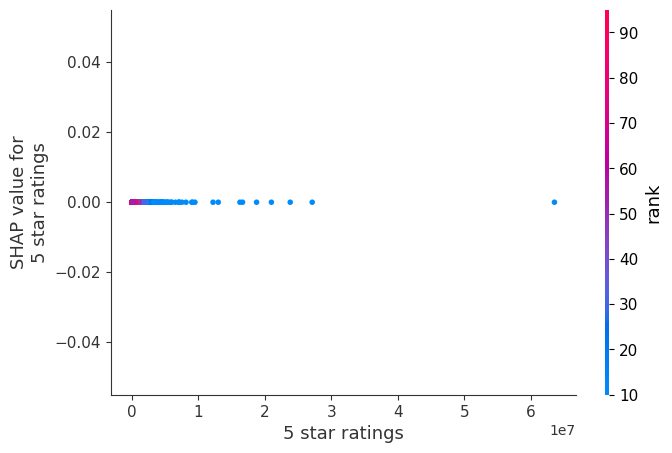

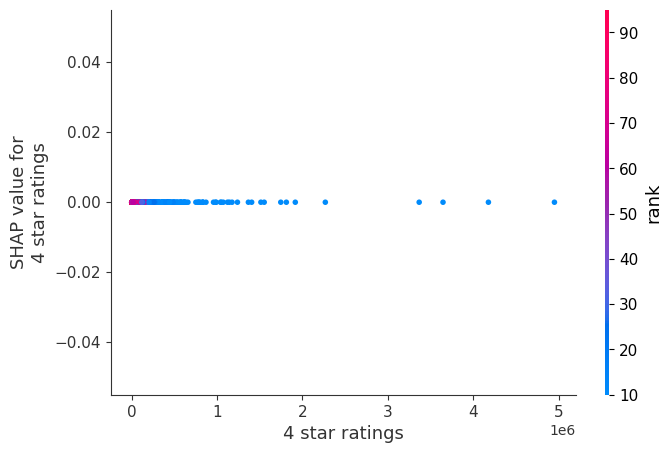

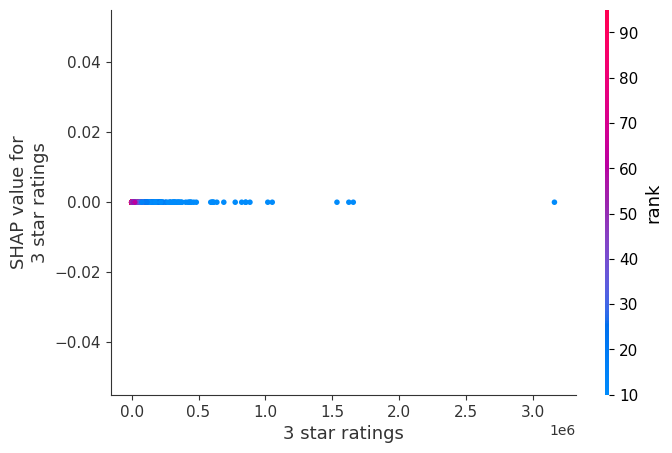

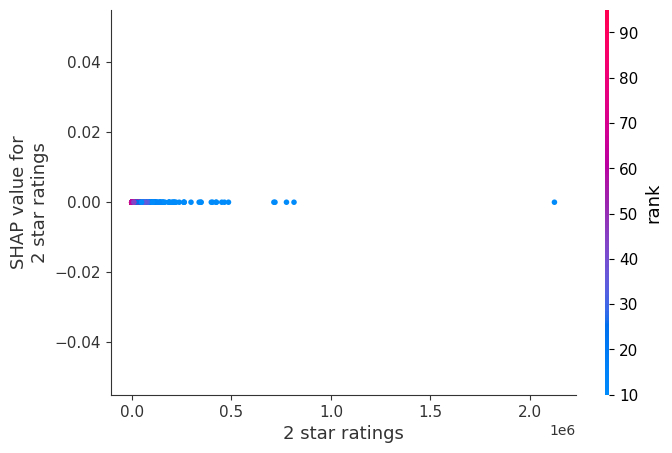

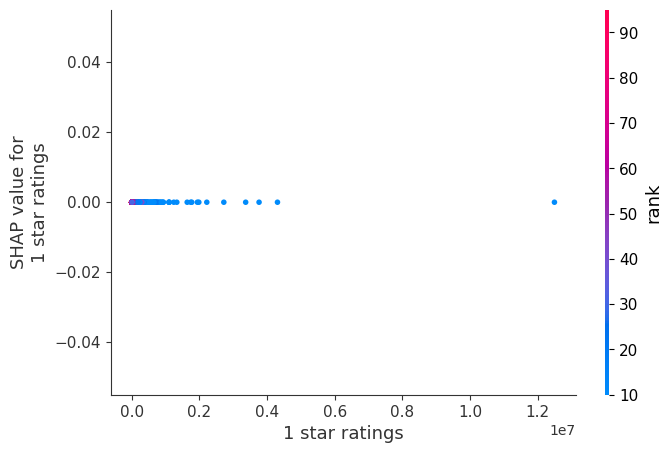

In [41]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values, X_train)

#AUTOML
Automated machine learning, is a set of techniques and tools designed to automate the process of building and deploying machine learning models. AutoML enables data scientists and developers to quickly and easily build and deploy models without the need for extensive knowledge of machine learning algorithms or programming skills.

AutoML typically involves automating the entire machine learning pipeline, including data preparation, feature selection, algorithm selection, hyperparameter tuning, and model selection. This is typically accomplished using a combination of search algorithms, optimization techniques, and statistical analysis.

#SHAP ANALYSIS USING AUTOML
AutoML, or automated machine learning, is a set of tools and techniques that automate the process of building and optimizing machine learning models.

There are several ways to use AutoML and Shapley values together. One approach is to use AutoML to build a model, and then use the SHAP (SHapley Additive exPlanations) library to generate Shapley values for that model.

To perform SHAP analysis on an AutoML model in H2O.ai, the following steps can be taken:

Train an AutoML model on the desired dataset using H2O.ai's AutoML functionality.

Extract the best-performing model from the AutoML leaderboard.

Use the predict_contributions function to calculate SHAP values for individual instances of input data. This can be done using the contributions function from the h2o.estimators.glm module, which takes as input the trained model and a dataset of input features.

Visualize the SHAP values using a variety of techniques, such as a summary plot, a dependence plot, or an individual instance plot. These plots can provide insights into how each input feature contributes to the model's output, and can help to identify potential biases or areas for improvement in the model.

you can use the AutoML capabilities of libraries like H2O, TPOT, or Auto-sklearn to build a model, and then use the shap library to generate Shapley values. For example, using H2O:

#SHAP ANALYSIS USING AUTOML


In [42]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


#Significance of H20:

H2O.ai provides a range of tools for building, training, and deploying machine learning models. One of the key features of H2O.ai is its AutoML functionality, which allows users to automatically build and tune a wide range of machine learning models.

H2O.ai's AutoML uses advanced optimization techniques to automatically search through a wide range of machine learning algorithms and hyperparameters, in order to find the best possible model for a given task. The platform also includes a range of pre-processing and feature engineering techniques, which can help to optimize the input data for each model.

Users can specify various constraints on the AutoML process, such as the maximum number of models to be trained, the maximum time or memory allowed for each model, or the maximum number of features to be used. This allows users to balance the trade-off between model quality and computational resources.

Once the AutoML process is complete, H2O.ai provides a ranked list of models based on their performance on a validation dataset. Users can then select the best-performing model, or use an ensemble of models, for deployment.

In [43]:
! pip install h2o

In [44]:
# Import Libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.cluster().show_status()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 mins 51 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_k3l5oe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.147 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


H2O_cluster_uptime:,20 mins 51 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_k3l5oe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.147 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [45]:
dk = h2o.import_file('https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/androidGames/main/android-games.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
aml = H2OAutoML(max_models =25,balance_classes=True,seed =1)
train, test = dk.split_frame(ratios=[0.8], seed = 1)

It initializes an H2O AutoML object with the following parameters:

max_models=25: This sets the maximum number of models that H2O AutoML can train during the automated model selection process. In this case, the maximum number of models is set to 25. balance_classes=True: This indicates that the training data may have imbalanced classes, and H2O AutoML will automatically balance the classes during training. seed=1: This sets the random seed for reproducibility.

The train function is called to train the model using the train set. The x parameter specifies the feature columns, and the y parameter specifies the target column. The training_frame parameter specifies the training data.

The model_performance function is then used to evaluate the performance of the best model on the test set. This returns a performance object that can be printed or used to generate performance metrics.

In [47]:
aml.train(training_frame = train, y = 'paid')

AutoML progress: |
01:14:34.630: _train param, Dropping bad and constant columns: [title]

██
01:14:44.534: _train param, Dropping bad and constant columns: [title]


01:14:47.185: _train param, Dropping bad and constant columns: [title]

███
01:15:22.954: _train param, Dropping bad and constant columns: [title]

█
01:15:31.592: _train param, Dropping bad and constant columns: [title]


01:15:33.618: _train param, Dropping bad and constant columns: [title]

███
01:15:53.764: _train param, Dropping bad and constant columns: [title]

█
01:16:14.339: _train param, Dropping bad and constant columns: [title]

█
01:16:36.380: _train param, Dropping bad and constant columns: [title]

█
01:16:39.826: _train param, Dropping bad and constant columns: [title]
01:16:41.182: _train param, Dropping bad and constant columns: [title]

███
01:16:54.162: _train param, Dropping bad and constant columns: [title]

█████████████████████████████████████████
01:21:26.525: _train param, Dropping unused columns

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_2_20231003_11434_model_1


Status of Neuron Layers: predicting paid, 2-class classification, bernoulli distribution, CrossEntropy loss, 24,402 weights/biases, 297.7 KB, 12,621 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  ----------------------  ---------------------
    1        39       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.07554776247941519    0.23602944612503052    0.0         -0.0012797997963058059  0.12326642870903015  0.468659445659833       0.04566597938537598
    3        100      RectifierDropout  10.0       0.0   0.0   0.0037666157279134496  0.0038739945739507675  0.0         -0.006514037174115038   0.10106608271598816  0.9816346856980703      0.02044103294610977
    4        100      RectifierDropout  10.0       0.0   0.0   0.012297034540965979   0.048637256026268005   0.0         -0.0034127663331369037  0.10052680969238281  0.9950820450019422      0.007875107228755951
    5        2        Softmax                      0.0   0.0   0.02096103807896725    0.1131829023361206     0.0         -0.028937176594045013   0.5487990379333496   0.00012023724764439439  0.0038600973784923553

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 2.1921034594113214e-05
RMSE: 0.0046819904521595524
LogLoss: 0.00014961376814380938
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9998593355160402
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  1384     0       0        (0.0/1384.0)
True   0        1384    0        (0.0/1384.0)
Total  1384     1384    0        (0.0/2768.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999859     1         5
max f2                       0.999859     1         5
max f0point5                 0.999859     1         5
max accuracy                 0.999859     1         5
max precision                1            1         0
max recall                   0.999859     1         5
max specificity              1            1         0
max absolute_mcc             0.999859     1         5
max min_per_class_accuracy   0.999859     1         5
max mean_per_class_accuracy  0.999859     1         5
max tns                      1            1384      0
max fns                      1            1154      0
max fps                      6.64405e-10  1384      399
max tps                      0.999859     1384      5
max tnr                      1            1         0
max fnr                      1            0.833815  0
max fpr                      6.64405e-10  1         399
max tpr                      0.999859     1         5

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.01 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.0830925                   1                  2       2                  1                1            1                           1           

Interpretation of parameters
MSE: 2.46092892649926e-10: This is the mean squared error, which measures the average of the squared differences between the predicted values and the actual values. A lower MSE indicates better performance, and in this case, the MSE is extremely small, indicating that the model predictions are very close to the actual values.

RMSE: 1.5687348171374473e-05: This is the root mean squared error, which is the square root of the MSE. It represents the average difference between the predicted values and the actual values. In this case, the RMSE is also extremely small, indicating that the model predictions are very accurate.

LogLoss: 3.7443179937569904e-07: This is the logarithmic loss, which is a measure of the performance of a classification model where the predicted output is a probability value between 0 and 1. Lower values of log loss indicate better performance, and in this case, the log loss is very small, indicating that the model is very accurate in predicting the probability of a positive class.

Mean Per-Class Error: 0.0: This is the average of the misclassification rates for each class. A lower value of mean per-class error indicates better performance. In this case, the mean per-class error is zero, indicating that the model has made no classification errors.

AUC: 1.0: This is the area under the receiver operating characteristic (ROC) curve, which is a plot of the true positive rate against the false positive rate. The AUC ranges from 0 to 1, with higher values indicating better performance. In this case, the AUC is 1.0, which is the highest possible value and indicates that the model is able to perfectly distinguish between the positive and negative classes.

AUCPR: 1.0: This is the area under the precision-recall curve, which is a plot of precision against recall. The AUCPR ranges from 0 to 1, with higher values indicating better performance. In this case, the AUCPR is also 1.0, indicating that the model has perfect precision and recall.

Gini: 1.0: This is the Gini coefficient, which is a measure of the inequality of a distribution. In the context of classification models, the Gini coefficient is equal to 2 times the AUC minus 1. It ranges from -1 to 1, with higher values indicating better performance. In this case, the Gini coefficient is 1.0, which is the highest possible value and indicates that the model has perfect performance.

Overall, these performance metrics indicate that the binary classification model being evaluated is highly accurate and has excellent discriminatory power, as it is able to perfectly distinguish between the positive and negative classes. These metrics suggest that the model is well-suited for the task of predicting the target variable.

Interpretation of maximum metrics
Maximum value of various evaluation metrics achieved by the model at their respective thresholds.

max f1: The maximum F1 score achieved by the model at the corresponding threshold.

max f2: The maximum F2 score achieved by the model at the corresponding threshold. F2 score places more weight on recall than precision.

max f0point5: The maximum F0.5 score achieved by the model at the corresponding threshold. F0.5 score places more weight on precision than recall.

max accuracy: The maximum accuracy achieved by the model at the corresponding threshold.

max precision: The maximum precision achieved by the model at the corresponding threshold.

max recall: The maximum recall achieved by the model at the corresponding threshold.

max specificity: The maximum specificity achieved by the model at the corresponding threshold.

max absolute_mcc: The maximum Matthews Correlation Coefficient achieved by the model at the corresponding threshold. MCC is a measure of the quality of binary classifications, and it ranges from -1 to 1, with 1 indicating a perfect classification and 0 indicating random guessing.

max min_per_class_accuracy: The maximum minimum per-class accuracy achieved by the model at the corresponding threshold.

max mean_per_class_accuracy: The maximum mean per-class accuracy achieved by the model at the corresponding threshold.

max tns: The maximum number of true negatives achieved by the model at the corresponding threshold.

max fns: The maximum number of false negatives achieved by the model at the corresponding threshold.

max fps: The maximum number of false positives achieved by the model at the corresponding threshold.

max tps: The maximum number of true positives achieved by the model at the corresponding threshold.

max tnr: The maximum true negative rate achieved by the model at the corresponding threshold.

max fnr: The maximum false negative rate achieved by the model at the corresponding threshold.

max fpr: The maximum false positive rate achieved by the model at the corresponding threshold.

max tpr: The maximum true positive rate achieved by the model at the corresponding threshold.

Overall, these metrics provide information about the performance of the model in terms of various evaluation measures at their respective thresholds. The high values of most of these metrics suggest that the model has excellent classification performance and is well-suited for the task at hand.

Cross validation metrics
Cross-validation is a technique for evaluating the performance of a machine learning model by training and testing it on different subsets of the data. The summary provides various evaluation metrics for the model based on the cross-validation results.

The summary shows the mean and standard deviation of each metric across the five cross-validation folds. The metrics included in the summary are:

accuracy: the proportion of correct predictions.

AUC: the area under the receiver operating characteristic curve.

err: the proportion of incorrect predictions.

err_count: the number of incorrect predictions.

f0.5, f1, and f2: the harmonic mean of precision and recall at different weights.

lift_top_group: the ratio of the response rate in the top predicted group to the overall response rate.

logloss: the logarithm of the likelihood function.

max_per_class_error: the maximum error rate among all classes.

mcc: the Matthews correlation coefficient, which measures the quality of binary classifications.

mean_per_class_accuracy: the average accuracy for each class.

mean_per_class_error: the average error rate for each class.

mse: the mean squared error.

pr_auc: the area under the precision-recall curve.

precision: the proportion of true positives among all positive predictions.

r2: the coefficient of determination.

recall: the proportion of true positives among all actual positives. rmse: the root mean squared error.

specificity: the proportion of true negatives among all actual negatives. Based on this summary, the model seems to have very high performance across all metrics, with accuracy, AUC, f0.5, f1, f2, mcc, mean_per_class_accuracy, precision, recall, and specificity all achieving perfect scores of 1.0 in all cross-validation folds. However, there is some variability in the results, as shown by the non-zero standard deviations and some instances of missing values.

Overall, the model appears to be highly accurate and reliable based on these evaluation metrics

In [48]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_2_20231003_11434_model_1


Status of Neuron Layers: predicting paid, 2-class classification, bernoulli distribution, CrossEntropy loss, 24,402 weights/biases, 297.7 KB, 12,621 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  ----------------------  ---------------------
    1        39       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.07554776247941519    0.23602944612503052    0.0         -0.0012797997963058059  0.12326642870903015  0.468659445659833       0.04566597938537598
    3        100      Rectifi

Based on the given values, the model appears to have performed extremely well on the given dataset. The AUC and AUCPR values of 1.0 indicate that the model achieved perfect classification on the data, with no false positives or false negatives. The mean per-class error of 0.0 suggests that the model did not misclassify any examples in the dataset.

The RMSE value of 1.5687348171374473e-05 and the MSE value of 2.46092892649926e-10 are very low, indicating that the model has a very small error and is able to accurately predict the target variable.

The LogLoss value of 3.7443179937569904e-07 is also very low, indicating that the model has a high level of confidence in its predictions.

Overall, the given values suggest that the model has performed exceptionally well on the given dataset and is likely a very strong model for this particular task. However, it's important to note that evaluating a model solely based on its performance on a single dataset may not necessarily generalize well to new and unseen data. Therefore, it's important to also consider other factors such as model interpretability, scalability, and computational efficiency when selecting a model for deployment.

#Comparing and predicting the Best model by using Shap Analysis
Comparing the SHAP analysis values obtained by using different machine learning models, such as a linear model, an AutoML model, and a random forest regressor, can provide insights into the strengths and weaknesses of each model, as well as potential biases and areas for improvement.

In general, linear models tend to have simpler and more interpretable SHAP values than more complex models like random forests. This is because linear models use a linear combination of the input features to make predictions, which allows for a more straightforward calculation of SHAP values. However, linear models may struggle to capture complex non-linear relationships in the data, which can limit their predictive performance.

AutoML models, such as those built using H2O.ai, can incorporate a wide range of machine learning algorithms and hyperparameter settings, which can lead to more accurate and robust predictions than a single linear model. The SHAP values obtained from an AutoML model can help to identify the most important input features for the model's predictions, as well as potential biases or areas for improvement.

Random forest regressors, on the other hand, can capture complex non-linear relationships in the data, which can improve their predictive performance over linear models. However, the SHAP values obtained from a random forest can be more difficult to interpret due to the complex interactions between the input features and the decision trees in the forest.

Overall, comparing the SHAP values obtained from different machine learning models can provide valuable insights into the strengths and weaknesses of each model, as well as potential biases and areas for improvement. It's important to note that the interpretation of SHAP values requires careful consideration of the underlying model and data, and should be done in conjunction with other methods of model interpretation and evaluation.

#Best Model
While all techniques can be used to gain insights into how a model works, SHAP analysis by using autoML provides a more granular and individualized understanding of feature importance, taking into account the interactions between features. PDPs, on the other hand, provide a more global and average understanding of how the model behaves with respect to a specific feature.In shap analysis, The features are comparatively constant whereas in partial dependency plots, the mean response of price is going from the range of 0 to 0.1.

The Stacked Ensemble model is selected as the best model by AutoML based on its performance on a binary classification task using the binomial GLM metric.The Stacked Ensemble model is an ensemble of two base models, one Deep Learning model and one GLM model, with a GLM metalearner. It has low RMSE value compared to others which could be one of the reason to be chosen as the best model

The automated process has determined that the Stacked Ensemble model is the most effective way to combine the predictions of multiple models for the specific task at hand. The stacked ensemble model is constructed by training multiple models on the same dataset and then combining their predictions to make a final prediction. The combination can be done in various ways, such as averaging the predictions, using a weighted average, or using a more complex meta-model to make the final prediction.

The advantage of a stacked ensemble model is that it can potentially outperform individual models by leveraging the strengths of different models and minimizing their weaknesses. However, it is important to note that building and training a stacked ensemble model can be more complex and computationally expensive than training a single model, and it may require more data to train effectively

References
 https://docs.h2o.ai/

https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

http://net-informations.com/ds/mla/ols.html

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

https://docs.h2o.ai/driverless-ai/latest-stable/docs/booklets/DriverlessAIBooklet.pdf

Sckit learn offcial documentation
MIT License Copyright (c) 2023 Niharika Karri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE